In [2]:
# Importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load data
df = pd.read_csv('./Data/CTLT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
1,2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2,2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
3,2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
4,2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...,...
1079,2023-04-17,46.009998,49.860001,42.529999,45.430000,45.430000,14629300
1080,2023-04-18,45.200001,45.375000,41.509998,42.080002,42.080002,10057000
1081,2023-04-19,41.419998,43.669998,41.330002,43.070000,43.070000,6744900
1082,2023-04-20,42.660000,44.410000,42.259998,44.400002,44.400002,3464300


In [8]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...
2023-04-17,46.009998,49.860001,42.529999,45.430000,45.430000,14629300
2023-04-18,45.200001,45.375000,41.509998,42.080002,42.080002,10057000
2023-04-19,41.419998,43.669998,41.330002,43.070000,43.070000,6744900


In [9]:
# Descriptive Statistical
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1.084000e+03
mean,81.386891,82.582040,80.080622,81.360083,81.360083,1.316687e+06
std,29.623591,29.926995,29.218822,29.553762,29.553762,1.607532e+06
min,30.049999,30.660000,29.290001,29.840000,29.840000,2.197000e+05
25%,52.202500,53.042000,51.707500,52.247501,52.247501,7.046750e+05
50%,83.495002,84.510002,82.259998,83.505001,83.505001,9.811000e+05
75%,106.260000,108.073750,104.765001,106.450002,106.450002,1.423700e+06
max,142.639999,142.639999,140.779999,142.350006,142.350006,3.083880e+07


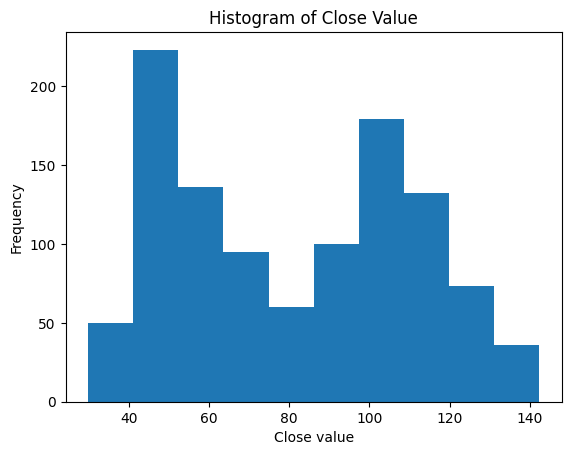

In [10]:
#  Draw a histogram
plt.hist(df['Close'])

# Set label and title
plt.xlabel('Close value')
plt.ylabel('Frequency')
plt.title('Histogram of Close Value')

# Display histogram
plt.show()

In [13]:
# Select the Close column as the dependent variable
df_Close = df[['Close']]
df_Close = df_Close.dropna() # Drop missing values
df_Close = df_Close.reset_index(drop=True) # Reset the index
df_Close

,Close
0,30.910000
1,29.840000
2,31.080000
3,32.000000
4,32.790001
...,...
1079,45.430000
1080,42.080002
1081,43.070000
1082,44.400002


In [16]:
# Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(df_Close)
data_scaled

array([[0.00951027],
       [0.        ],
       [0.01102124],
       ...,
       [0.11758954],
       [0.12941073],
       [0.13501021]])

In [17]:
# Splitting the data into train, test, and validate
train_size = int(0.7 * len(data_scaled))
test_size = int(0.2 * len(data_scaled))
val_size = len(data_scaled) - train_size - test_size

In [18]:
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:train_size+test_size]
val_data = data_scaled[train_size+test_size:]


In [19]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [21]:
# Defining the GBT Model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0)


In [22]:
# Fitting the model with the train data
model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, random_state=0)

In [23]:
# Predicting on train, test, and val data
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_val=model.predict(X_val)

In [24]:
# Scaling the data back to the original range
y_pred_train=scaler.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test=scaler.inverse_transform(y_pred_test.reshape(-1,1))
y_pred_val=scaler.inverse_transform(y_pred_val.reshape(-1,1))

In [25]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [26]:
# Calculating RMSE, MSLE, MAPE on the unscaled data
valid_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_val.reshape(-1,1)), y_pred_val))
test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)), y_pred_test))
valid_msle = mean_squared_log_error(scaler.inverse_transform(y_val.reshape(-1,1)), y_pred_val)
test_msle = mean_squared_log_error(scaler.inverse_transform(y_test.reshape(-1,1)), y_pred_test)
valid_mape = mean_absolute_percentage_error(scaler.inverse_transform(y_val.reshape(-1,1)), y_pred_val)
test_mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test.reshape(-1,1)), y_pred_test)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 9.272706944543987
Testing RMSE: 7.388610379206964
Validation MSLE: 0.027125656009440717
Testing MSLE: 0.011442935820516394
Validation MAPE: 12.841741468103155
Testing MAPE: 7.529714916421358


In [28]:
# Predicting the next 30 days
x_input=test_data[-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output=[]
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1,1))

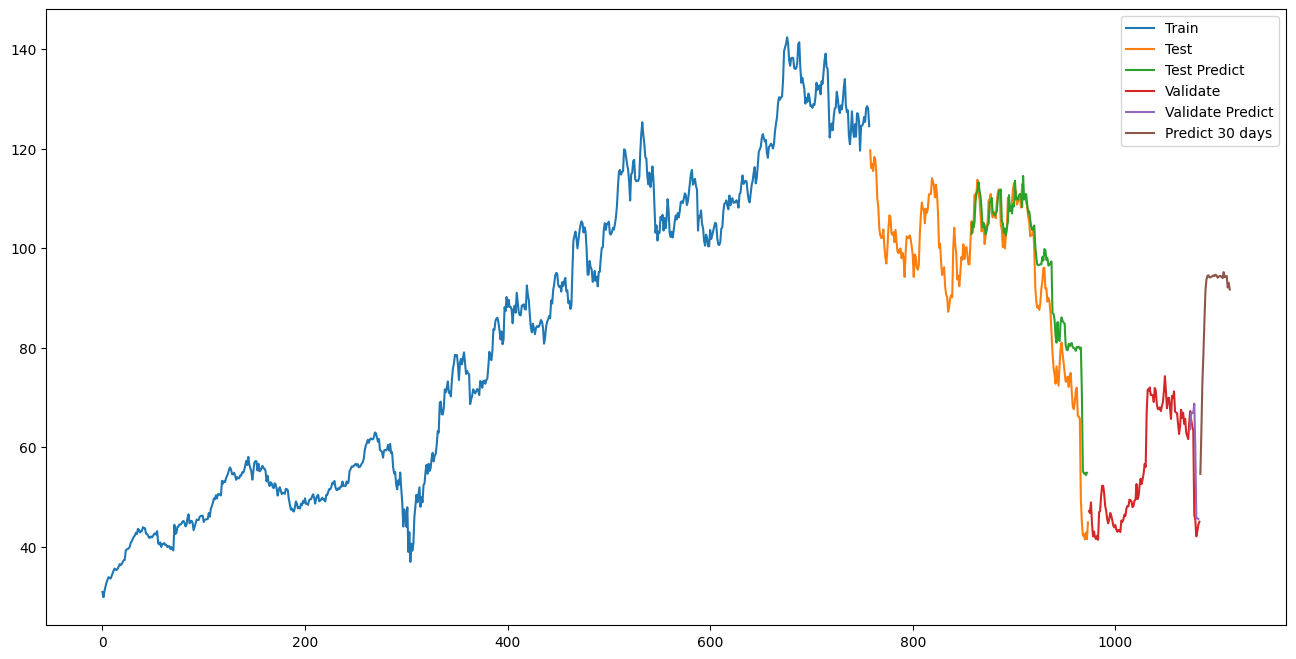

In [36]:
# Plotting the data
plt.figure(figsize=(16,8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))
test_pred_index = pd.RangeIndex(start=train_size + time_step, stop=train_size + test_size - 1, step=1) 
plt.plot(test_pred_index, y_pred_test)
val_data_index = pd.RangeIndex(start=train_size + test_size, stop=train_size + test_size + val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(val_data))
val_pred_index = pd.RangeIndex(start=train_size + test_size + time_step, stop=train_size + test_size + val_size - 1, step=1)
plt.plot(val_pred_index, y_pred_val)
predict_data_index = pd.RangeIndex(start=len(df_Close), stop=len(df_Close) + 30, step=1)
plt.plot(predict_data_index, lst_output)
plt.legend(['Train', 'Test', 'Test Predict', 'Validate', 'Validate Predict', 'Predict 30 days'])
plt.show()
